### CSE-221710304051-Sanjana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv",index_col='Unnamed: 0')
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### 1.Perform all the necessary data preprocessing steps required

In [3]:
df.shape

(200, 4)

In [4]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.drop_duplicates()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


### 2.Visualize the relationship between the features and the response using scatterplots¶

Text(0.5, 1.0, 'TV vs sales')

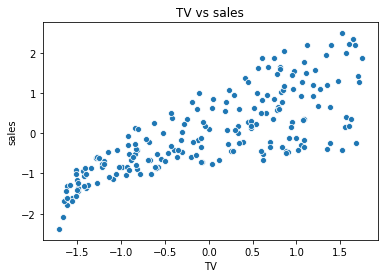

In [9]:
sns.scatterplot(df.TV,df.sales)
plt.title("TV vs sales")

Text(0.5, 1.0, 'newspaper vs sales')

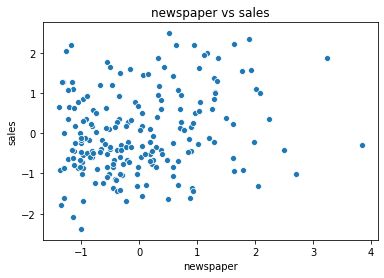

In [10]:
sns.scatterplot(df.newspaper,df.sales)
plt.title("newspaper vs sales")

Text(0.5, 1.0, 'radio vs sales')

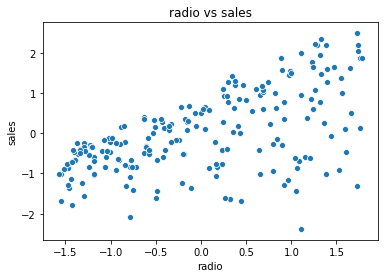

In [11]:
sns.scatterplot(df.radio,df.sales)
plt.title("radio vs sales")

### 3.Check for correlation and observe if there is any multicollinearity

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### * If there exists correlation between input variables then it is called multi-collinearity.

### * We have perfect multicollinearity if the correlation between two independent variables is equal to 1 or −1.

### * Two input variables are said to be in good relationship if r>0.85

- corr() between TV and radio is 0.05
- corr() between radio and newspaper is 0.35
- corr() between TV and newspaper is 0.05

### * Since all the corr() are less than 0.85 there exits no multi-collinearity between any input variables

### 4.After building a Linear Regression Model, write down the interpretation of the model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
X = df.drop(['sales'],axis=1)
y = df['sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 3)
(40, 3)
(160,)
(40,)


In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lr.intercept_)
print(lr.coef_)

0.001162087460638478
[0.77081214 0.50806629 0.01079522]


### * Interpretation of the model:
#### The regression line of the model, makes an intercept on the y-axis at 0.001162087460638478
#### and the coef of the inputs respectively are:[0.77081214, 0.50806629, 0.01079522]
#### and the effect of the inputs TV, Radio and newpaper on Sales respectively are in the order:TV > Radio > Newspaper
#### Therefore, it can be interpreted that the model thinks that the amount spent on TV commercials,is of great significance as it brings in much more sales than any other Media.
#### Radio is also moderately useful but not greater than TV

In [19]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

### Find out how well does the model fit the data?

Text(0.5, 1.0, 'Training Data')

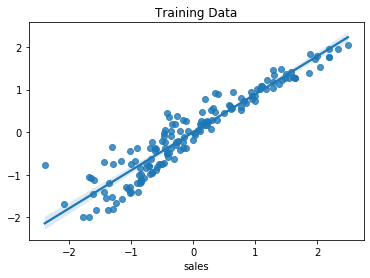

In [20]:
sns.regplot(y_train,y_train_pred)
plt.title('Training Data')

#### It can be observed that the model is working good,
#### and that there is not much differnce between the ACTUAL and PREDICTED values of the training data.
####  can be inferred from the graph by noticing that there are less
#### residual values(the values that are far away from the reg line), indicating minimal error in the prediction

Text(0.5, 1.0, 'Testing Data')

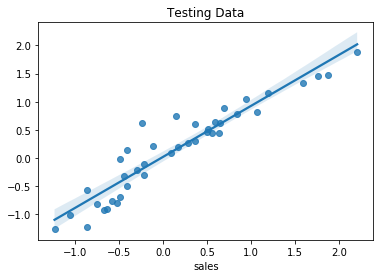

In [21]:
sns.regplot(y_test,y_test_pred)
plt.title('Testing Data')

#### The model appears to work with almost same accuracy, and, there is not much difference between the ACTUAL and PREDICTED values of the testing data.
#### This can be infered from the data ny noticing that the residual values are pretty less, indicating minimal error in the prediction.

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
print('Training Metrics:\n')
print('R2 score: ',r2_score(y_train,y_train_pred))
print('Adjusted R2 score: ',1- (1-r2_score(y_train, y_train_pred))*(len(X_train)-1)/
                                  (len(X_train)-X_train.shape[1]-1))
print('MAE: ',mean_absolute_error(y_train,y_train_pred))
print('MSE: ',mean_squared_error(y_train,y_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nTesting Metrics:\n')
print('R2 score:', r2_score(y_test,y_test_pred))
print('Adjusted R2 score:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training Metrics:

R2 score:  0.8959372632325174
Adjusted R2 score:  0.8939360567562197
MAE:  0.2553322418777194
MSE:  0.11138075570325359
RMSE:  0.3337375551286573

Testing Metrics:

R2 score: 0.8927605914615384
Adjusted R2 score: 0.8838239740833332
MAE: 0.19987243199696364
MSE: 0.07353999839228301
RMSE 0.27118259234744957


#### From the above R2 scores of TRAIN and TEST data: It can be inferred that the model has an 89% accuracy in predicting Training data and an 88% accuracy in predicting Testing data. From the above values of the RMSE of TRAIN and TEST data: It can be infered that the model has an error magnitude of 0.33 for Training data and an error magnitude of 0.27 fro Testing data.